In [16]:
import Utils
from Utils import showURL
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [108]:
# fonts not working
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams["figure.dpi"] = 150

In [9]:
plt.rcParams['font.family']

['sans-serif']

In [ ]:
showURL("https://iter01.com/550161.html")

In [19]:
# function to retrieve two, trey or ft
def get_data(shot, start_id, end_id):
    # data = {'PlayerA': {'made': 2, 'total': 4}, ....}
    data = {}
    target = shot + '_m_' +shot
    for j in range(start_id, end_id+1):

        # access csv
        for place in ['home', 'away']:
            try:
                df = pd.read_csv(f'../Games/{j}/{place}.csv')
            # game_id not in file or did not play
            except:
                break

            for i in range(len(df)-1):

                # Player's name
                name = df['name_alt'][i]

                # Player's data
                try:
                    made, total = df[target][i].split('-')
                    made, total = int(made), int(total)
                except:
                    pass
                
                # if player exist in dict
                try:
                    data[name]['made'] += made
                    data[name]['total'] += total
                # player is not in dict
                except:
                    # Create new dict for player
                    player_data = {'made': made, 'total': total}
                    data[name] = player_data
    return data


In [127]:

from turtle import color

from matplotlib.ft2font import BOLD


def plot_scatter(data, shot):

    # decide title, xlabel, ylabel according to shot
    title='2-Point Scorers'
    xla = "Total 2-Point Shots"
    yla = "2-Point FG"

    if shot == 'trey':
        title = '3-Point Shooters'
        xla = "Total 3-Point Shots"
        yla = "3-Point FG"
    elif shot == 'ft':
        title = 'Free Throw Masters'
        xla = "Total FreeThrow Shots"
        yla = "FreeThrow FG"

    # create name, field goal, percentage list
    name = []
    player_index = np.arange(0, len(data))
    per = []
    total = []
    scatter_size = [] # total attemps * percentage = p_stat['made']?

    for player in data:
        p_stat = data[player]
        name.append(player)
        per.append(0 if p_stat['total'] == 0 else p_stat['made']/p_stat['total'])
        total.append(p_stat['total'])
        scatter_size.append(p_stat['made'])

    fig = plt.figure()

    fig.patch.set_facecolor('#1b1b24')

    

    ax = fig.add_subplot(111, facecolor='#1b1b24')

    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.tick_params(axis='x', colors='white') 
    ax.tick_params(axis='y', colors='white') 
    
    plt.scatter(total, per, c=total, s=scatter_size, cmap='plasma', alpha=0.9)
    """
    plt.title('My subtitle',fontsize=16)
    plt.suptitle('My title',fontsize=24, y=1)
    """
    plt.title('Volume and Efficiency, 2021-22 Season | By @jhsu12',fontsize=13, color='w', fontweight = "bold", y=1)
    plt.suptitle(title, color='w', fontsize=24, fontweight = "bold", y=1)
    plt.xlabel(xla)
    plt.ylabel(yla)
    
    
    for i, ind in enumerate(player_index):
        plt.annotate(ind, (total[i], per[i]), color='g', fontsize = 13)
    
    #plt.plasma(plt.scatter(total, per))
    #plt.set_cmap("gist_rainbow") 
    plt.ylim(0.4, 0.8)
    
    plt.show()
        

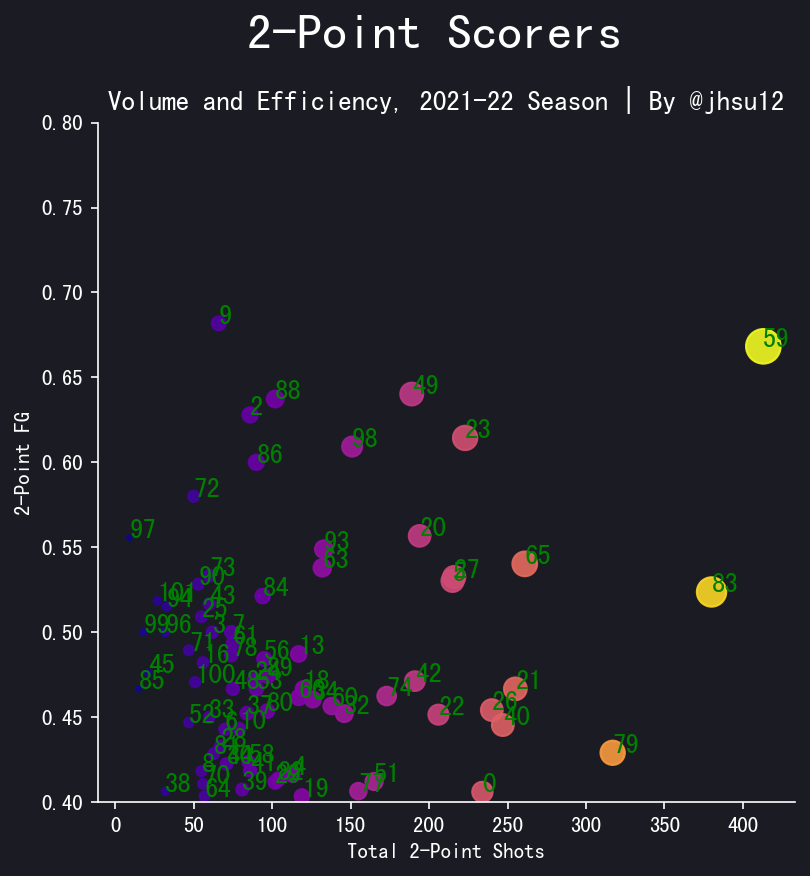

In [128]:
data = get_data('two', 73, 162)
plot_scatter(data, 'two')


In [36]:
player_pID = dict()
key_list = list(data.keys())
for i in range(len(data)):
    player_pID[i] = key_list[i]


'喬丹'

In [181]:
for i in range(len(player_pID)):
    if player_pID[i] == '錢肯尼':
        print(i)

17


In [183]:
player_pID[59]

'辛巴'

In [186]:
data['錢肯尼']['made']/data['錢肯尼']['total']

0.355

In [182]:
count = 0
for i in data:
    if data[i]['total'] >= 200:
        count += 1
        
count

13